In [19]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [21]:
import os
os.getcwd()

'C:\\Users\\user\\캡스톤 2학기 파일'

In [23]:
seoul_2022 = pd.read_csv('서울교통공사_역별 일별 시간대별 승하차인원 정보_20220731.csv', encoding='cp949')
seoul_2020 = pd.read_csv('서울교통공사 2020년 일별 역별 시간대별 승하차인원(1_8호선).csv', encoding='cp949')
seoul_2019 =pd.read_excel('2019_02_04.xlsx', engine='openpyxl')

>#불러온 2019/2020/2022년 데이터를 승차인원과 하차인원을 구분하기 위해
연도별 승하차 인원으로 구분해놓습니다.

In [24]:
seoul_2022_ride = seoul_2022[seoul_2022['구분']=='승차']
seoul_2022_drop = seoul_2022[seoul_2022['구분']=='하차']
seoul_2020_ride = seoul_2020[seoul_2020['구분']=='승차']
seoul_2020_drop = seoul_2020[seoul_2020['구분']=='하차']
seoul_2019_ride = seoul_2019[seoul_2019['구분']=='승차']
seoul_2019_drop = seoul_2019[seoul_2019['구분']=='하차']

>#연도별로 주말과 평일로 구분해놓은 데이터를 불러옵니다

In [ ]:
seoul_2019_weekend =pd.read_excel('2019 주말.xlsx', engine='openpyxl')
seoul_2019_weekday =pd.read_excel('2019 평일.xlsx', engine='openpyxl')
seoul_2020_weekend =pd.read_excel('2020 주말.xlsx', engine='openpyxl')
seoul_2020_weekday =pd.read_excel('2020 평일.xlsx', engine='openpyxl')
seoul_2022_weekend =pd.read_excel('2022 주말.xlsx', engine='openpyxl')
seoul_2022_weekday =pd.read_excel('2022 평일.xlsx', engine='openpyxl')

#전체적인 평균값을 정리한 데이터를 불러옵니다.

In [31]:
seoul_subway_average = pd.read_csv('지하철데이터 평균값.csv', encoding='cp949')
seoul_subway_average

,시간,6시 이전,6시,7시,8시,9시,10시,11시,12시,13시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시이후
0,2019,136.770725,374.338447,974.020858,1724.009602,1133.495383,788.429193,770.073667,820.974913,892.378815,...,937.612176,1046.171216,1263.341532,1752.723248,1250.526885,844.440000,789.576160,704.962350,393.701370,106.311670
1,2020,82.070001,166.164980,202.721098,333.524848,423.702478,399.519982,413.632477,483.639743,534.192682,...,534.907292,569.748540,591.914753,547.378811,436.300376,398.193266,377.103153,322.465486,187.591021,14.778059
2,2022,110.471650,310.051508,786.118098,1358.809749,864.839171,569.237762,545.213924,592.442167,631.761558,...,680.052435,775.121971,1002.601677,1374.511579,845.411324,568.002060,545.403123,425.674592,220.703148,0.000000
3,2019평일,154.447396,452.453344,1323.586225,2353.408351,1384.713744,851.281109,786.692419,805.964961,874.138521,...,942.662219,1077.585485,1392.118059,2176.884191,1515.875408,949.735088,883.586040,797.469831,440.429153,143.590663
4,2019주말,102.006606,220.712485,286.542303,486.192061,639.432606,664.820424,737.390121,850.494485,928.251394,...,927.680424,984.389818,1010.081030,918.540061,728.674788,637.359818,604.690061,523.030970,301.803394,32.996364
5,2020평일,131.994558,371.176390,1021.940433,1837.404037,1063.185372,556.612610,483.389204,496.061088,548.475102,...,604.771796,689.470509,1027.978760,1729.589789,1128.310298,658.127823,569.360240,486.254418,262.985986,68.108104
6,2020주말,82.070001,166.164980,202.721098,333.524848,423.702478,399.519982,413.632477,483.639743,534.192682,...,534.907292,569.748540,519.914753,547.378811,436.300376,398.193266,377.103153,322.465486,187.591021,14.778059
7,2022평일,129.951851,384.932971,1066.530582,1846.369363,1065.284431,618.960956,558.775144,585.528779,623.382879,...,695.397104,817.151075,1155.528596,1751.812691,1031.460558,636.662043,601.152297,472.559116,238.883050,0.000000
8,2022주말,73.947792,169.574760,260.733101,441.597372,486.967444,473.526459,516.986741,602.601515,644.353676,...,648.117379,693.226586,712.563395,663.849828,495.627915,435.977862,435.210548,337.408843,188.451580,0.000000
9,2019평일승차,245.056641,529.386071,1633.072912,1999.296518,1132.293744,762.356240,751.880678,805.180401,865.264099,...,984.615100,1159.269954,1537.372696,2416.390570,1323.774114,956.114761,946.882589,796.237658,372.323698,73.149646


>#데이터 준비가 마무리됬으니 우선 첨두시간대를 선정하기 위해 전채적인 이용량을 비교합니다.

In [33]:
#2019 주말 승차/하차
seoul_2019_weekend_ride = seoul_2019_weekend[seoul_2019_weekend['구분']=='승차']
seoul_2019_weekend_drop = seoul_2019_weekend[seoul_2019_weekend['구분']=='하차']
#2019 평일 승차/하차
seoul_2019_weekday_ride = seoul_2019_weekday[seoul_2019_weekday['구분']=='승차']
seoul_2019_weekday_drop = seoul_2019_weekday[seoul_2019_weekday['구분']=='하차']
#2020 주말 승차/하차
seoul_2020_weekend_ride = seoul_2020_weekend[seoul_2020_weekend['구분']=='승차']
seoul_2020_weekend_drop = seoul_2020_weekend[seoul_2020_weekend['구분']=='하차']
#2020 평일 승차/하차
seoul_2020_weekday_ride = seoul_2020_weekday[seoul_2020_weekday['구분']=='승차']
seoul_2020_weekday_drop = seoul_2020_weekday[seoul_2020_weekday['구분']=='하차']
#2022 주말 승차/하차
seoul_2022_weekend_ride = seoul_2022_weekend[seoul_2022_weekend['구분']=='승차']
seoul_2022_weekend_drop = seoul_2022_weekend[seoul_2022_weekend['구분']=='하차']
#2022 평일 승차/하차
seoul_2022_weekday_ride = seoul_2022_weekday[seoul_2022_weekday['구분']=='승차']
seoul_2022_weekday_drop = seoul_2022_weekday[seoul_2022_weekday['구분']=='하차']

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12744\230410094.py:10: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ax.plot(seoul_2022_weekend_ride.mean()[3:], label = '2022')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12744\230410094.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.plot(seoul_2022_weekend_ride.mean()[3:], label = '2022')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12744\230410094.py:11: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ax.plot(seoul_2020_weekend_ride.mean()[2:], label = '2020')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12744\230410094.py:

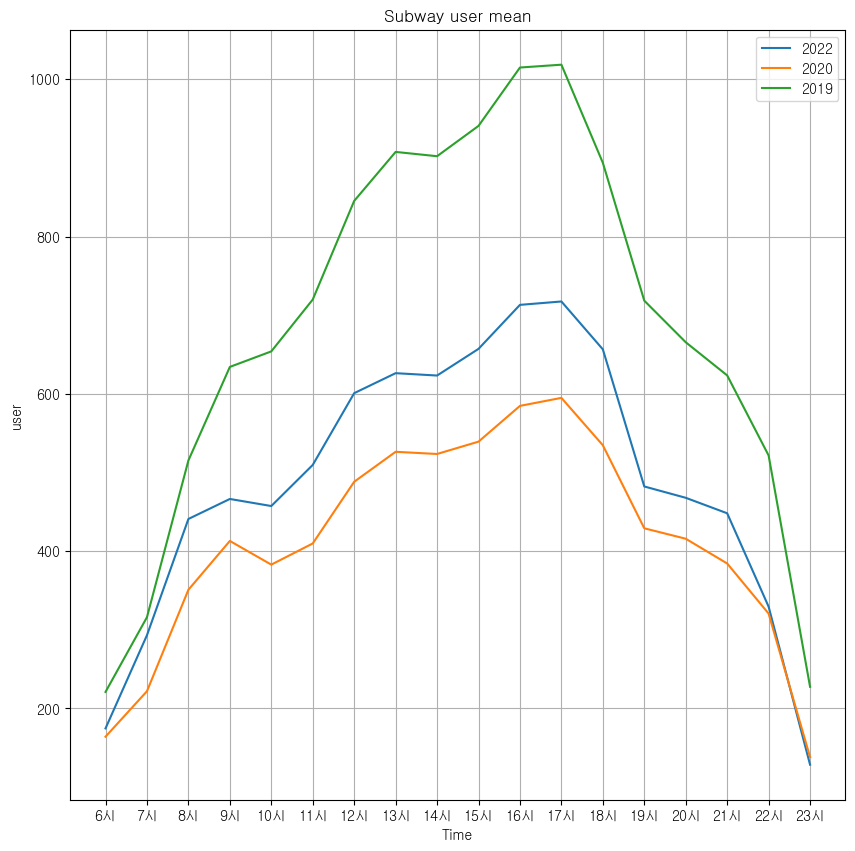

In [34]:
#주말 탑승 승객 비교
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot()

plt.title('Subway user mean')
plt.xlabel('Time')
plt.ylabel('user')

ax.plot(seoul_2022_weekend_ride.mean()[3:], label = '2022')
ax.plot(seoul_2020_weekend_ride.mean()[2:], label = '2020')
ax.plot(seoul_2019_weekend_ride.mean()[2:], label = '2019')
plt.grid(True)
plt.legend()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12744\1099080422.py:10: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ax.plot(seoul_2022_weekend_drop.mean()[3:], label = '2022')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12744\1099080422.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.plot(seoul_2022_weekend_drop.mean()[3:], label = '2022')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12744\1099080422.py:11: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ax.plot(seoul_2020_weekend_drop.mean()[2:], label = '2020')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12744\1099080422

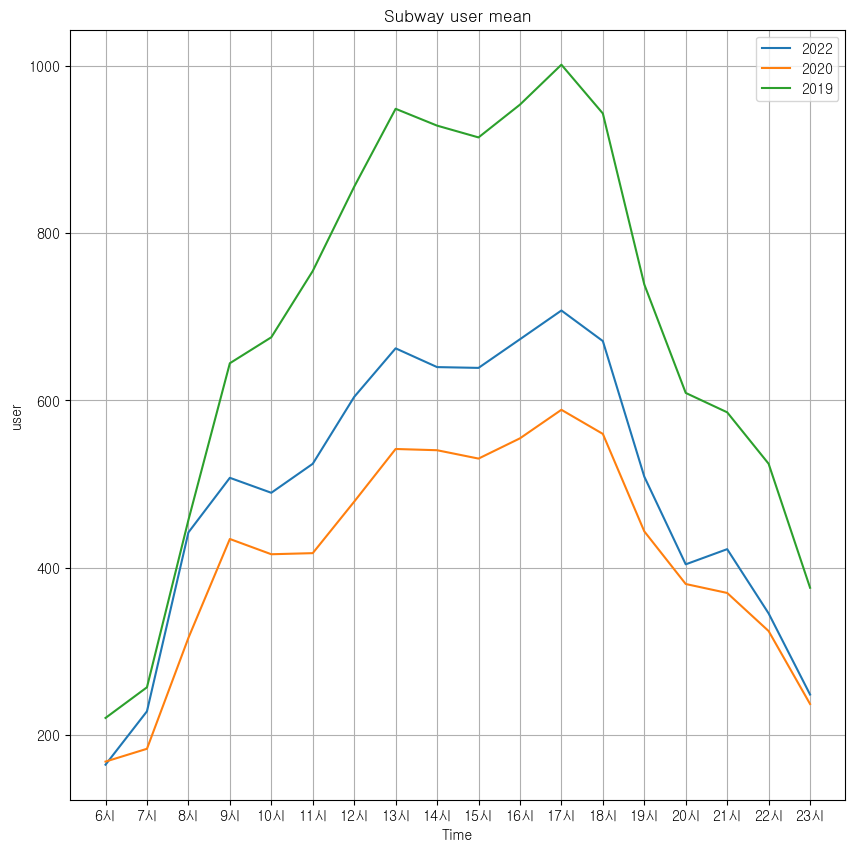

In [35]:
#주말 하차 승객 비교
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot()

plt.title('Subway user mean')
plt.xlabel('Time')
plt.ylabel('user')

ax.plot(seoul_2022_weekend_drop.mean()[3:], label = '2022')
ax.plot(seoul_2020_weekend_drop.mean()[2:], label = '2020')
ax.plot(seoul_2019_weekend_drop.mean()[2:], label = '2019')
plt.grid(True)
plt.legend()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12744\208910749.py:10: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ax.plot(seoul_2022_weekday_ride.mean()[3:], label = '2022')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12744\208910749.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.plot(seoul_2022_weekday_ride.mean()[3:], label = '2022')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12744\208910749.py:11: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ax.plot(seoul_2020_weekday_ride.mean()[2:], label = '2020')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12744\208910749.py:

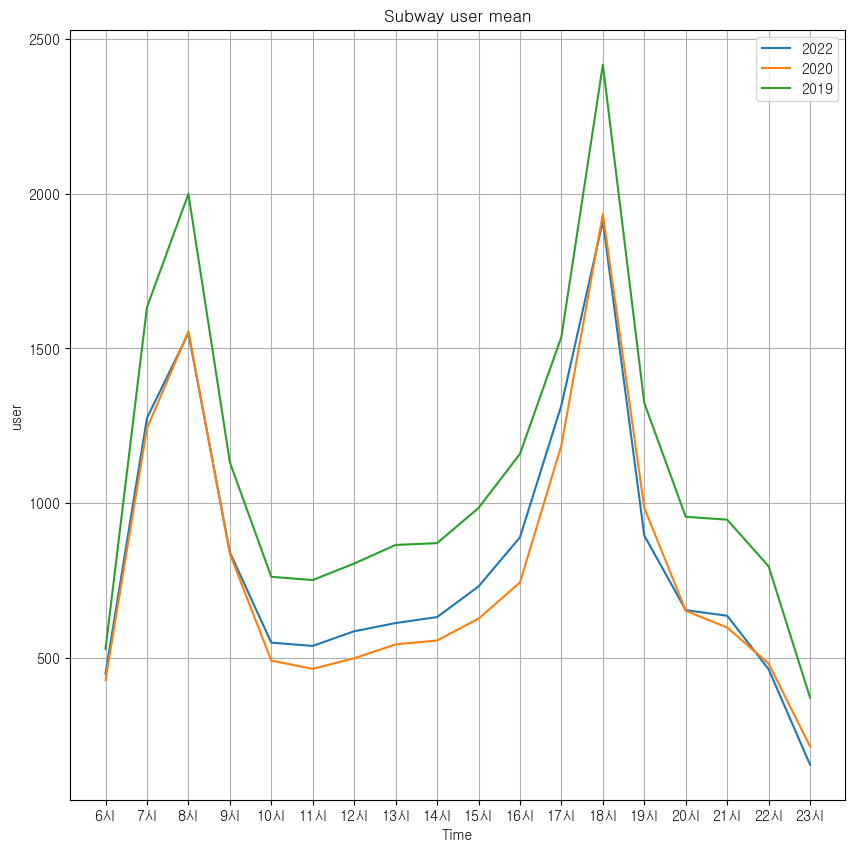

In [36]:
#평일 승차 승객 비교
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot()

plt.title('Subway user mean')
plt.xlabel('Time')
plt.ylabel('user')

ax.plot(seoul_2022_weekday_ride.mean()[3:], label = '2022')
ax.plot(seoul_2020_weekday_ride.mean()[2:], label = '2020')
ax.plot(seoul_2019_weekday_ride.mean()[2:], label = '2019')
plt.grid(True)
plt.legend()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12744\3771150071.py:10: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ax.plot(seoul_2022_weekday_drop.mean()[3:], label = '2022')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12744\3771150071.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.plot(seoul_2022_weekday_drop.mean()[3:], label = '2022')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12744\3771150071.py:11: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ax.plot(seoul_2020_weekday_drop.mean()[2:], label = '2020')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12744\3771150071

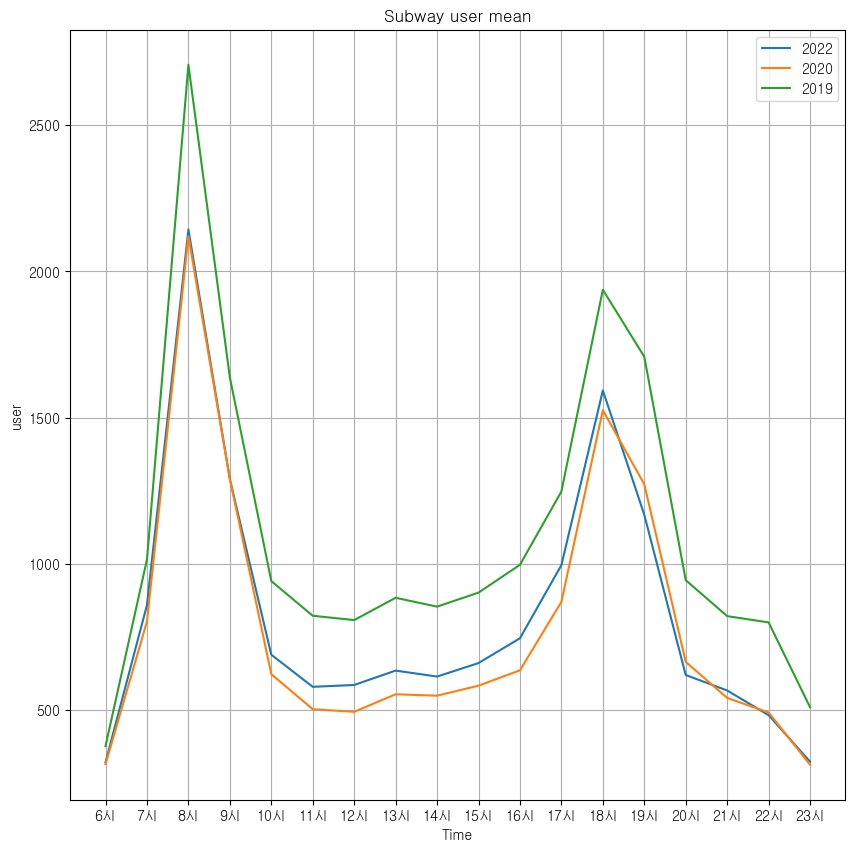

In [37]:
#평일 하차 승객 비교
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot()

plt.title('Subway user mean')
plt.xlabel('Time')
plt.ylabel('user')

ax.plot(seoul_2022_weekday_drop.mean()[3:], label = '2022')
ax.plot(seoul_2020_weekday_drop.mean()[2:], label = '2020')
ax.plot(seoul_2019_weekday_drop.mean()[2:], label = '2019')
plt.grid(True)
plt.legend()

>#평일 7시~9시, 17시~19시 주말 13시~~17시 시간대의 통행량 데이터가 이용패턴 차이를 유의미하게 보여준다.

>이제 감소율을 확인합니다.

In [38]:
#2019년도 대비 2020년도 감소율
rate_2020_weekday_drop = (seoul_2020_weekday_drop.mean()[2:] - seoul_2019_weekday_drop.mean()[2:])/seoul_2019_weekday_drop.mean()[2:]*100
rate_2020_weekday_drop.name = "2019-2020 평일 하차 증감률"
rate_2020_weekend_drop = (seoul_2020_weekend_drop.mean()[2:] - seoul_2019_weekend_drop.mean()[2:])/seoul_2019_weekend_drop.mean()[2:]*100
rate_2020_weekend_drop.name = "2019-2020 주말 하차 증감률"

rate_2020_weekday_ride = (seoul_2020_weekday_ride.mean()[2:] - seoul_2019_weekday_ride.mean()[2:])/seoul_2019_weekday_ride.mean()[2:]*100
rate_2020_weekday_ride.name = "2019-2020 평일 탑승 증감률"
rate_2020_weekend_ride = (seoul_2020_weekend_ride.mean()[2:] - seoul_2019_weekend_ride.mean()[2:])/seoul_2019_weekend_ride.mean()[2:]*100
rate_2020_weekend_ride.name = "2019-2020 주말 탑승 증감률"

#2019년도대비 2022년도 감소율
rate_2022_weekday_drop = (seoul_2022_weekday_drop.mean()[3:] - seoul_2019_weekday_drop.mean()[2:])/seoul_2019_weekday_drop.mean()[2:]*100
rate_2022_weekday_drop.name = "2019-2022 평일 하차 증감률"
rate_2022_weekend_drop = (seoul_2022_weekend_drop.mean()[3:] - seoul_2019_weekend_drop.mean()[2:])/seoul_2019_weekend_drop.mean()[2:]*100
rate_2022_weekend_drop.name = "2019-2022 주말 하차 증감률"

rate_2022_weekday_ride = (seoul_2022_weekday_ride.mean()[3:] - seoul_2019_weekday_ride.mean()[2:])/seoul_2019_weekday_ride.mean()[2:]*100
rate_2022_weekday_ride.name = "2019-2022 평일 탑승 증감률"
rate_2022_weekend_ride = (seoul_2022_weekend_ride.mean()[3:] - seoul_2019_weekend_ride.mean()[2:])/seoul_2019_weekend_ride.mean()[2:]*100
rate_2022_weekend_ride.name = "2019-2022 주말 탑승 증감률"

#2019년도대비 2020년/2022년도 승하차 총 감소율
rate_2020_drop = (seoul_2020_drop.mean()[2:] - seoul_2019_drop.mean()[2:]) / seoul_2019_drop.mean()[2:]*100
rate_2020_drop.name = "2019-2020 하차 증감률"
rate_2022_drop = (seoul_2022_drop.mean()[3:] - seoul_2019_drop.mean()[2:]) / seoul_2019_drop.mean()[2:]*100
rate_2022_drop.name = "2019-2022 하차 증감률"

rate_2020_ride = (seoul_2020_ride.mean()[2:] - seoul_2019_ride.mean()[2:]) / seoul_2019_ride.mean()[2:]*100
rate_2020_ride.name = "2019-2020 승차 증감률"
rate_2022_ride = (seoul_2022_ride.mean()[3:] - seoul_2019_ride.mean()[2:]) / seoul_2019_ride.mean()[2:]*100
rate_2022_ride.name = "2019-2022 승차 증감률"

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12744\1605879576.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  rate_2020_weekday_drop = (seoul_2020_weekday_drop.mean()[2:] - seoul_2019_weekday_drop.mean()[2:])/seoul_2019_weekday_drop.mean()[2:]*100
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12744\1605879576.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rate_2020_weekday_drop = (seoul_2020_weekday_drop.mean()[2:] - seoul_2019_weekday_drop.mean()[2:])/seoul_2019_weekday_drop.mean()[2:]*100
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12744\1605879576.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in

In [39]:
result = pd.concat([rate_2020_weekday_drop, rate_2020_weekend_drop, rate_2020_weekday_ride, rate_2020_weekend_ride, rate_2022_weekday_drop, rate_2022_weekend_drop, rate_2022_weekday_ride, rate_2022_weekend_ride],axis=1)
result

,2019-2020 평일 하차 증감률,2019-2020 주말 하차 증감률,2019-2020 평일 탑승 증감률,2019-2020 주말 탑승 증감률,2019-2022 평일 하차 증감률,2019-2022 주말 하차 증감률,2019-2022 평일 탑승 증감률,2019-2022 주말 탑승 증감률
6시,-16.501348,-23.683803,-19.000867,-25.741399,-14.743691,-25.369310,-15.050480,-20.976634
7시,-20.900094,-28.614108,-23.963647,-29.771875,-15.391294,-11.178029,-21.923592,-7.241832
8시,-21.711035,-30.835238,-22.216713,-31.901909,-20.833700,-3.236557,-22.507984,-14.435473
9시,-21.226224,-32.609473,-26.102331,-34.884175,-21.251743,-21.259408,-25.694672,-26.469834
10시,-33.876030,-38.405765,-35.525720,-41.454698,-26.801163,-27.525171,-27.894331,-30.063435
11시,-38.937460,-44.697387,-38.135516,-43.076095,-29.600661,-30.541308,-28.284260,-29.206487
12시,-38.910194,-44.015884,-37.991479,-42.242075,-27.536070,-29.374222,-27.164751,-28.916885
13시,-37.393385,-42.877021,-37.114496,-42.007160,-28.220828,-30.192092,-29.160771,-30.993950
14시,-35.741086,-41.798621,-36.103476,-41.964161,-28.063480,-31.094014,-27.413030,-30.909565
15시,-35.352584,-41.994202,-36.294063,-42.674732,-26.766540,-30.135376,-25.740161,-30.136027


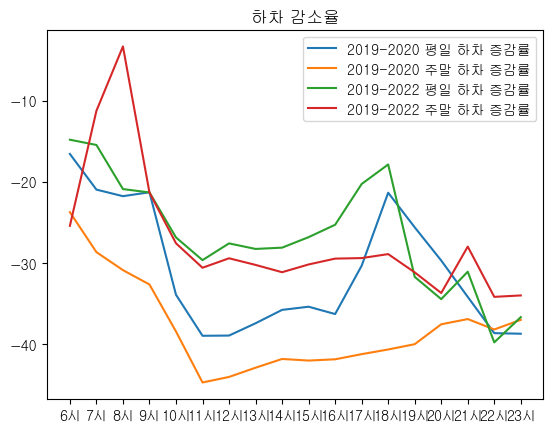

In [40]:
#평일 주말 하차 감소율
plt.title('하차 감소율')

plt.plot(rate_2020_weekday_drop, label= rate_2020_weekday_drop.name )
plt.plot(rate_2020_weekend_drop, label= rate_2020_weekend_drop.name )
plt.plot(rate_2022_weekday_drop, label= rate_2022_weekday_drop.name )
plt.plot(rate_2022_weekend_drop, label= rate_2022_weekend_drop.name )

plt.legend()

#하차인원 감소율
#rate_2020_weekday_drop.mean() #30.8
#rate_2020_weekend_drop.mean() #37.8
#rate_2022_weekday_drop.mean() #26.4
#rate_2022_weekend_drop.mean() #27.1

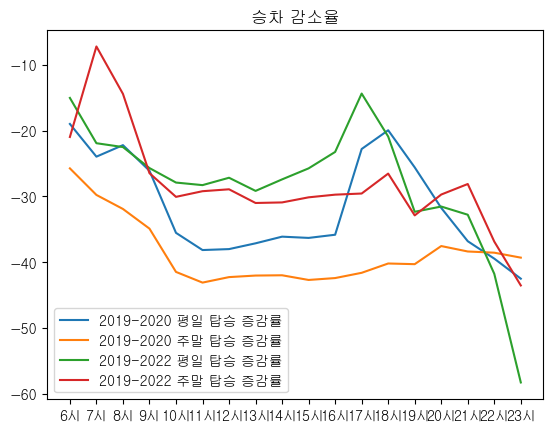

In [42]:
#평일 주말 승차 감소율
plt.title('승차 감소율')

plt.plot(rate_2020_weekday_ride, label= rate_2020_weekday_ride.name )
plt.plot(rate_2020_weekend_ride, label= rate_2020_weekend_ride.name )
plt.plot(rate_2022_weekday_ride, label= rate_2022_weekday_ride.name )
plt.plot(rate_2022_weekend_ride, label= rate_2022_weekend_ride.name )
plt.legend()

#승차인원 감소율
#rate_2020_weekday_ride.mean() #31.5
#rate_2020_weekend_ride.mean() #38.5
#rate_2022_weekday_ride.mean() #28.1
#rate_2022_weekend_ride.mean() 28.1

In [ ]:
#2019대비 2020/2022년도 승하차 인원 감소율
rate_2020_drop = (seoul_2020_drop.mean()[2:] - seoul_2019_drop.mean()[2:]) / seoul_2019_drop.mean()[2:]*100
rate_2020_drop.name = "2019-2020 하차 증감률"
rate_2022_drop = (seoul_2022_drop.mean()[3:] - seoul_2019_drop.mean()[2:]) / seoul_2019_drop.mean()[2:]*100
rate_2022_drop.name = "2019-2022 하차 증감률"
rate_2020_ride = (seoul_2020_ride.mean()[2:] - seoul_2019_ride.mean()[2:]) / seoul_2019_ride.mean()[2:]*100
rate_2020_ride.name = "2019-2020 승차 증감률"
rate_2022_ride = (seoul_2022_ride.mean()[3:] - seoul_2019_ride.mean()[2:]) / seoul_2019_ride.mean()[2:]*100
rate_2022_ride.name = "2019-2022 승차 증감률"

>연도별 총 감소율
/2019년 대비 2020년 하차인원 감소율 53.7%
/2019년 대비 2022년 하차인원 감소율 27%
/2019년 대비 2020년 승차인원 감소율 54.9%
/2019년 대비 2022년 승차인원 감소율 28.5%

>여기까지는 연도별 승하차 인원의 감소율과 유의미한 결과를 보기위한 첨두시간대를 찾아봤습니다.

> 이제 군집분석을 통해 지하철 이용감소 패턴을 알아볼것입니다.

> 2019년도와 2022년도의 데이터의 길이가 다른부분이 있어서 엑셀을 이용해 크기와 값을 맞춰온 데이터를 불러옵니다.

In [44]:
subway_2019 =pd.read_excel('2019.xlsx', engine='openpyxl')
subway_2022 =pd.read_excel('2022.xlsx', engine='openpyxl')

In [45]:
subway_2019_a = subway_2019.iloc[:,3:]
subway_2019_a_ride = subway_2019_a[subway_2019_a['gubun']=='승차']
subway_2019_a_drop = subway_2019_a[subway_2019_a['gubun']=='하차']


subway_2019_a_ride = subway_2019_a_ride.drop(['gubun'],axis=1).set_index(['platform_name'])
subway_2019_a_drop = subway_2019_a_drop.drop(['gubun'],axis=1).set_index(['platform_name'])

In [46]:
subway_2022_a = subway_2022.iloc[:,3:]
subway_2022_a_ride = subway_2022_a[subway_2022_a['gubun']=='승차']
subway_2022_a_drop = subway_2022_a[subway_2022_a['gubun']=='하차']


subway_2022_a_ride = subway_2022_a_ride.drop(['gubun'],axis=1).set_index(['platform_name'])
subway_2022_a_drop = subway_2022_a_drop.drop(['gubun'],axis=1).set_index(['platform_name'])

In [48]:
# 두 데이터를 이어붙혀 정리한 데이터입니다.
version1_2019_2022 = pd.read_excel('2019_2022(version 1).xlsx', engine='openpyxl')
version1_2019_2022

,year,date,line_number,platform_number,platform_name,gubun,주말여부,평일출근,왼쪽민,평일퇴근,...,14,15,16,17,18,19,20,21,22,23
0,2019,02-01,1,150,서울역,승차,NaN,5753,1917.666667,18739,...,3302,4798,5261,6561,7878,4300,3099,3044,2276,1037
1,2019,02-01,1,150,서울역,하차,NaN,20169,6723.000000,12735,...,3207,3024,3799,4208,4860,3667,2520,2136,1419,703
2,2019,02-01,1,151,시청,승차,NaN,988,329.333333,11641,...,1609,2172,2617,3613,5746,2282,1444,1363,956,390
3,2019,02-01,1,151,시청,하차,NaN,15156,5052.000000,2343,...,1109,980,897,865,952,526,294,261,164,123
4,2019,02-01,1,152,종각,승차,NaN,1180,393.333333,19519,...,2918,3794,5100,7114,8555,3850,3133,3871,3459,1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94691,2022,04-30,8,2825,신흥,하차,1.0,0,0.000000,0,...,273,280,320,350,349,248,245,284,197,122
94692,2022,04-30,8,2826,수진,승차,1.0,0,0.000000,0,...,313,366,335,245,214,143,126,110,57,25
94693,2022,04-30,8,2826,수진,하차,1.0,0,0.000000,0,...,284,260,297,276,288,225,268,232,265,173
94694,2022,04-30,8,2827,모란,승차,1.0,0,0.000000,0,...,274,295,333,289,249,163,148,155,141,76


In [49]:
cc =(subway_2019_a_ride - subway_2022_a_ride)
cc.groupby('platform_name').mean()

,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
platform_name,,,,,,,,,,,,,,,,,,
가락시장,29.269663,136.123596,191.769663,157.000000,121.971910,119.483146,126.910112,128.505618,123.483146,119.365169,129.196629,74.432584,163.084270,154.926966,114.179775,125.505618,138.297753,80.292135
가산디지털단지,34.213483,47.640449,35.595506,130.550562,113.303371,154.595506,202.786517,310.550562,289.325843,386.348315,158.078652,-793.044944,1542.831461,1341.595506,786.101124,894.314607,474.842697,309.898876
강남,349.651685,476.146067,746.000000,732.471910,657.516854,877.887640,1153.415730,1840.382022,1618.168539,1830.943820,1979.056180,1626.280899,3108.584270,2628.426966,2238.269663,2923.325843,4448.662921,2262.179775
강남구청,25.292135,53.146067,91.044944,70.460674,56.876404,82.022472,79.528090,126.573034,132.247191,137.730337,55.741573,-51.550562,165.078652,284.213483,174.573034,117.887640,200.662921,134.617978
강동,166.348315,702.853933,806.011236,534.359551,357.258427,267.775281,251.483146,246.224719,181.786517,117.393258,120.224719,174.325843,110.044944,225.359551,133.887640,125.235955,114.157303,75.910112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
홍제,57.730337,390.224719,701.022472,444.460674,303.528090,292.617978,285.449438,314.438202,269.303371,277.393258,296.157303,354.314607,371.235955,251.955056,190.752809,165.033708,152.764045,86.483146
화곡,271.775281,872.685393,1068.146067,593.404494,402.910112,413.168539,347.629213,315.797753,299.640449,247.730337,232.483146,248.426966,358.247191,285.910112,213.179775,193.651685,196.370787,123.280899
화랑대(서울여대입구),18.550562,443.662921,500.471910,318.213483,197.764045,177.471910,175.471910,165.921348,141.337079,173.887640,206.247191,221.842697,225.179775,129.775281,91.764045,67.303371,62.651685,41.191011


우선 여기까지 정리가 되었습니다. 앞으로 진행하고 싶은 내용은 위의 cc데이터를 이용해 역별/시간별로 군집분석을 진행하고싶은데 y변수가 계속 시간으로만 잡혀서 방법을 찾아보고있는중입니다.